In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/proyectoml

/content/drive/MyDrive/proyectoml


In [ ]:
!ls

combined_dataset  dataset  runs  YOLO11  yolo11n.pt  yolo11s.pt  yolo11x.pt


In [ ]:
import os
import shutil  # Para copiar archivos
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Configuración
IMAGES_PATH = '/content/drive/MyDrive/proyectoml/combined_dataset/images'  # Ruta de imágenes sin etiquetar
LABELS_PATH = '/content/drive/MyDrive/proyectoml/combined_dataset/labels'  # Ruta de etiquetas
OUTPUT_PATH = '/content/drive/MyDrive/proyectoml/dataset'  # Ruta para el dataset dividido

# Crear carpetas necesarias
for split in ["train", "val", "test"]:
    os.makedirs(f"{OUTPUT_PATH}/{split}/images", exist_ok=True)
    os.makedirs(f"{OUTPUT_PATH}/{split}/labels", exist_ok=True)

# Procesar imágenes
all_data = []
for image_file in os.listdir(IMAGES_PATH):
    if image_file.lower().endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(IMAGES_PATH, image_file)
        image_name = os.path.splitext(image_file)[0]
        label_path = os.path.join(LABELS_PATH, f"{image_name}.txt")

        # Verificar que la imagen tiene una etiqueta asociada
        if os.path.exists(label_path):
            all_data.append((image_path, label_path))

# Dividir en train (80%), val (10%) y test (10%)
train, temp = train_test_split(all_data, test_size=0.2, random_state=42)
val, test = train_test_split(temp, test_size=0.5, random_state=42)

# Función para copiar archivos a las carpetas correspondientes
def copy_files(dataset, split):
    for image_path, label_path in dataset:
        print(f"Copiando {image_path} to {OUTPUT_PATH}/{split}/images/")
        shutil.copy(image_path, f"{OUTPUT_PATH}/{split}/images/")
        print(f"Copiando {label_path} to {OUTPUT_PATH}/{split}/labels/")
        shutil.copy(label_path, f"{OUTPUT_PATH}/{split}/labels/")

# Copiar archivos a cada carpeta
copy_files(train, "train")
copy_files(val, "val")
copy_files(test, "test")

print(f"Tamaño del conjunto de entrenamiento: {len(train)}")
print(f"Tamaño del conjunto de validación: {len(val)}")
print(f"Tamaño del conjunto de prueba: {len(test)}")

print("✅ Dataset creado y dividido correctamente. Archivos copiados a sus respectivas carpetas.")

Se han truncado las últimas 5000 líneas del flujo de salida.
Copiando /content/drive/MyDrive/proyectoml/combined_dataset/images/2_06_06-35-_jpg.rf.246810397fd858a3f7673c7082ddcf83.jpg to /content/drive/MyDrive/proyectoml/dataset/train/images/
Copiando /content/drive/MyDrive/proyectoml/combined_dataset/labels/2_06_06-35-_jpg.rf.246810397fd858a3f7673c7082ddcf83.txt to /content/drive/MyDrive/proyectoml/dataset/train/labels/
Copiando /content/drive/MyDrive/proyectoml/combined_dataset/images/7_2_jpg.rf.c5b0f699058687a70550cfa131cf87b3.jpg to /content/drive/MyDrive/proyectoml/dataset/train/images/
Copiando /content/drive/MyDrive/proyectoml/combined_dataset/labels/7_2_jpg.rf.c5b0f699058687a70550cfa131cf87b3.txt to /content/drive/MyDrive/proyectoml/dataset/train/labels/
Copiando /content/drive/MyDrive/proyectoml/combined_dataset/images/16_2_jpg.rf.36d48ce2c10b4bdf40c742d80bdd7486.jpg to /content/drive/MyDrive/proyectoml/dataset/train/images/
Copiando /content/drive/MyDrive/proyectoml/combined_

In [ ]:
!ls dataset/train/images | head -n 5  # Muestra las primeras 5 imágenes
!ls dataset/train/labels | head -n 5  # Muestra las primeras 5 etiquetas

10_1_jpg.rf.16f929b1c4a32d6aa9847818cc9422c9.jpg
10_1_jpg.rf.16f929b1c4a32d6aa9847818cc9422c9.npy
10_1_jpg.rf.25751b2b1c4afe18a058f3b05380897b.jpg
10_1_jpg.rf.25751b2b1c4afe18a058f3b05380897b.npy
10_1_jpg.rf.5eeca935e9a9d0313434363c444d546f.jpg
10_1_jpg.rf.16f929b1c4a32d6aa9847818cc9422c9.txt
10_1_jpg.rf.25751b2b1c4afe18a058f3b05380897b.txt
10_1_jpg.rf.5eeca935e9a9d0313434363c444d546f.txt
10_1_jpg.rf.6018ab6d660cd1e90d4c925950adaed3.txt
10_1_jpg.rf.ac92fbec342a91de8437f55ee5e01aa7.txt


In [ ]:
!pip uninstall ultralytics "ray[tune]"

Found existing installation: ultralytics 8.3.67
Uninstalling ultralytics-8.3.67:
  Would remove:
    /usr/local/bin/ultralytics
    /usr/local/bin/yolo
    /usr/local/lib/python3.11/dist-packages/tests/*
    /usr/local/lib/python3.11/dist-packages/ultralytics-8.3.67.dist-info/*
    /usr/local/lib/python3.11/dist-packages/ultralytics/*
Proceed (Y/n)? Y
  Successfully uninstalled ultralytics-8.3.67
Found existing installation: ray 2.41.0
Uninstalling ray-2.41.0:
  Would remove:
    /usr/local/bin/ray
    /usr/local/bin/rllib
    /usr/local/bin/serve
    /usr/local/bin/tune
    /usr/local/lib/python3.11/dist-packages/ray-2.41.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/ray/*
Proceed (Y/n)? Y
  Successfully uninstalled ray-2.41.0


In [ ]:
!pip install albumentations ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
# Install and update Ultralytics and Ray Tune packages
!pip install -U ultralytics "ray[tune]"

# Optionally install W&B for logging
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 MB 32.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Inicializa el modelo YOLO preentrenado
model = YOLO("yolo11x.pt")  # Puedes usar yolov8n.pt, yolov8s.pt, etc.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import os
WANDB_ENV_VAR = "WANDB_API_KEY"
os.environ[WANDB_ENV_VAR] = "6e05a458301829ac220faf91d589af333da9aea0"

## Ajuste de hiperparámetros

In [ ]:
# Ejecuta el ajuste de hiperparámetros
model.tune(
    data='/content/drive/MyDrive/proyectoml/dataset/data.yaml',           # Ruta al archivo de configuración del dataset
    epochs=30,                  # Número de épocas para cada prueba
    optimizer="AdamW",
    plots=True,                 # Generar gráficos de resultados
    save=True,                  # Guardar resultados y mejores modelos
    name='tune',  # Nombre del experimento
    exist_ok=True,
    gpu_per_trial = 1,
    batch=-1,
    use_ray=True
)

In [ ]:
# Ejecuta el ajuste de hiperparámetros
model.tune(
    data='/content/drive/MyDrive/proyectoml/dataset/data.yaml',           # Ruta al archivo de configuración del dataset
    epochs=30,                  # Número de épocas para cada prueba
    optimizer="AdamW",
    plots=True,                 # Generar gráficos de resultados
    save=True,                  # Guardar resultados y mejores modelos
    name='tune_faster',  # Nombre del experimento
    exist_ok=True,
    #gpu_per_trial = 1,
    batch=-1,
    use_ray=False
)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune_faster'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.00985, 'lrf': 0.01044, 'momentum': 0.93228, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.77521, 'box': 7.36616, 'cls': 0.51449, 'dfl': 1.45706, 'hsv_h': 0.01447, 'hsv_s': 0.71616, 'hsv_v': 0.40442, 'degrees': 0.0, 'translate': 0.11219, 'scale': 0.54819, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.53479, 'bgr': 0.0, 'mosaic': 0.96682, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune_faster/tune_scatter_plots.png
Saved runs/detect/tune_faster/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (2182.86s)
Tuner: Results saved to runs/detect/tune_faster
Tuner: Best fitness=0.33372 observed at iteration 17
Tuner: Best fitness metrics are None
Tuner: Best fitness model is None
Tuner: Best fitness hyperparameters are printed 

In [ ]:
!cat runs/detect/tune_faster/best_hyperparameters.yaml

# 10/10 iterations complete ✅ (21705.50s)
# Results saved to runs/detect/tune_faster
# Best fitness=0.36799 observed at iteration 25
# Best fitness metrics are None
# Best fitness model is None
# Best fitness hyperparameters are printed below.

lr0: 0.00915
lrf: 0.01058
momentum: 0.93191
weight_decay: 0.0005
warmup_epochs: 3.02887
warmup_momentum: 0.77216
box: 7.67483
cls: 0.51668
dfl: 1.45626
hsv_h: 0.0149
hsv_s: 0.67538
hsv_v: 0.40234
degrees: 0.0
translate: 0.12156
scale: 0.52179
shear: 0.0
perspective: 0.0
flipud: 0.0
fliplr: 0.5076
bgr: 0.0
mosaic: 0.92179
mixup: 0.0
copy_paste: 0.0


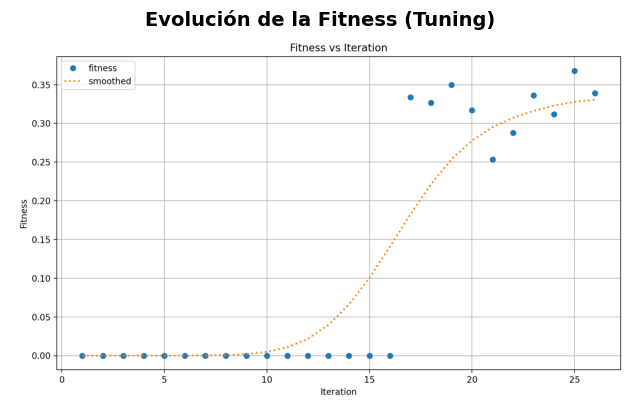

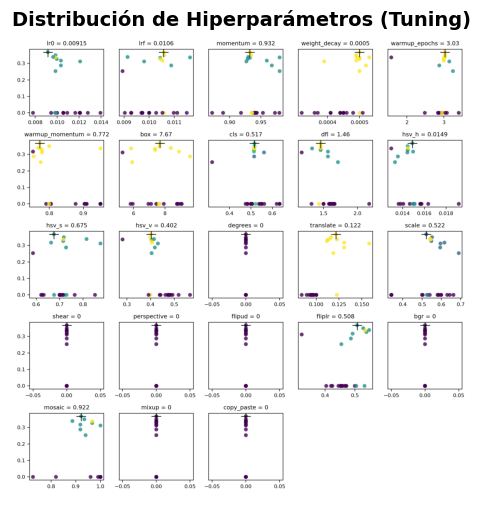

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Lista de imágenes con títulos explicativos
image_info = [
    ("/content/drive/MyDrive/proyectoml/runs/detect/tune_faster/tune_fitness.png", "Evolución de la Fitness (Tuning)"),
    ("/content/drive/MyDrive/proyectoml/runs/detect/tune_faster/tune_scatter_plots.png", "Distribución de Hiperparámetros (Tuning)")
]

# Mostrar imágenes con títulos
for img_path, title in image_info:
    if os.path.exists(img_path):  # Verificar si la imagen existe
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para matplotlib

        plt.figure(figsize=(8, 6))  # Tamaño de la figura
        plt.imshow(img)
        plt.axis("off")  # Ocultar ejes
        plt.title(title, fontsize=14, fontweight='bold')  # Agregar título descriptivo
        plt.show()
    else:
        print(f"⚠️ No se encontró la imagen: {img_path}")



## Entrenar el modelo con los mejores hiperparámetros

In [ ]:
# Entrenar el modelo con los mejores hiperparámetros
model.train(
    data="/content/drive/MyDrive/proyectoml/dataset/data.yaml",
    epochs=400,                          # Más épocas para el modelo final
    imgsz=640,                           # Tamaño de las imágenes
    batch=-1,                            # Tamaño del batch
    cfg="runs/detect/tune_faster/best_hyperparameters.yaml",
    optimizer="AdamW",          # Usar optimizador AdamW (puedes probar otros)
    exist_ok=True,
    val = True,
    plots= True,
    save = True,
    patience=50,
    name="final_model_tuned",
    device=0
)


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/content/drive/MyDrive/proyectoml/dataset/data.yaml, epochs=400, time=None, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=final_model_tuned, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 3.31MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics

train: Scanning /content/drive/MyDrive/proyectoml/dataset/train/labels.cache... 2458 images, 101 backgrounds, 0 corrupt: 100%|██████████| 2458/2458 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.48G reserved, 0.47G allocated, 13.79G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    56879551       195.5         3.475         83.55           230        (1, 3, 640, 640)                    list
    56879551       390.9         4.758          70.1         149.8        (2, 3, 640, 640)                    list
    56879551       781.9         7.065         95.28         193.4        (4, 3, 640, 640)                    list
    56879551        1564        11.394         191.1         322.5        (8, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 14.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 8.12 MiB is free. Process 61471 has 14.73 GiB memory in use. Of the allocated memory 14.36 GiB is allocated by PyTorch, and 186.13 MiB is reserved by P

train: Scanning /content/drive/MyDrive/proyectoml/dataset/train/labels.cache... 2458 images, 101 backgrounds, 0 corrupt: 100%|██████████| 2458/2458 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/proyectoml/dataset/val/labels.cache... 307 images, 21 backgrounds, 0 corrupt: 100%|██████████| 307/307 [00:00<?, ?it/s]


Plotting labels to runs/detect/final_model_tuned/labels.jpg... 
optimizer: AdamW(lr=0.00915, momentum=0.93191) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005078125), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/final_model_tuned
Starting training for 400 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/400       6.6G      1.781      2.546      1.071         16        640: 100%|██████████| 492/492 [04:59<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:10<00:00,  3.01it/s]

                   all        307       1359      0.675      0.124      0.122     0.0684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/400      6.22G      1.661      2.203      1.026          9        640: 100%|██████████| 492/492 [03:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.205       0.33      0.169      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/400      6.18G      1.595      2.101      1.017         19        640: 100%|██████████| 492/492 [03:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.78it/s]

                   all        307       1359      0.163      0.127      0.054     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/400      6.18G      1.521      1.988     0.9961         16        640: 100%|██████████| 492/492 [03:11<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.315      0.494      0.342      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/400      6.18G      1.513      1.902     0.9821         47        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359        0.4      0.444       0.36      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/400       6.2G      1.471      1.863     0.9667         33        640: 100%|██████████| 492/492 [03:12<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.378      0.493       0.38      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/400      6.25G      1.412      1.724     0.9595         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.376      0.506      0.398       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/400      6.19G      1.401      1.698     0.9494         13        640: 100%|██████████| 492/492 [03:11<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.81it/s]

                   all        307       1359      0.316      0.589      0.402      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/400      6.19G      1.417      1.681     0.9536         29        640: 100%|██████████| 492/492 [03:11<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.393      0.532      0.439      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/400      6.19G      1.399      1.624     0.9514         26        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.477      0.463      0.457      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/400      6.18G      1.393      1.625     0.9492          6        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.447      0.531      0.473      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/400      6.17G       1.38      1.594     0.9422         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.412       0.56      0.464      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/400      6.18G      1.363      1.569      0.945          8        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.411      0.603      0.493      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/400      6.05G      1.345      1.518     0.9398          2        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.80it/s]

                   all        307       1359        0.5      0.567      0.509      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/400      6.18G      1.355        1.5       0.93         10        640: 100%|██████████| 492/492 [03:11<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.451      0.633      0.533      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/400      6.18G      1.323      1.488     0.9284         21        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359       0.37      0.653      0.477      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/400      6.18G      1.333      1.482     0.9309         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.80it/s]

                   all        307       1359      0.457      0.627      0.521      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/400      6.18G      1.323      1.471     0.9309          9        640: 100%|██████████| 492/492 [03:11<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.423      0.526      0.435      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/400      6.17G      1.292      1.433     0.9214          1        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.80it/s]

                   all        307       1359      0.444      0.643      0.536      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/400      6.26G      1.307      1.398     0.9192         18        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.421      0.694      0.535      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/400      6.22G      1.305      1.428     0.9181         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.502      0.614      0.555      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/400       6.2G      1.298      1.406     0.9201         21        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.478      0.621       0.54      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/400      6.19G        1.3      1.382     0.9262          7        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.494       0.61       0.54      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/400      6.18G      1.282      1.367     0.9168         43        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.80it/s]

                   all        307       1359      0.422      0.694      0.535      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/400      6.18G      1.282      1.416     0.9198          6        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.81it/s]

                   all        307       1359      0.478      0.669      0.555      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/400      6.19G      1.288      1.403     0.9223          3        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.432      0.634      0.556       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/400      6.05G      1.298      1.381     0.9161         13        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.494      0.634      0.564      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/400      6.18G      1.252      1.316      0.907         33        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.529      0.601      0.559      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/400      6.19G      1.273      1.324     0.9121         13        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.499      0.687      0.576      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/400      6.19G      1.254      1.297     0.9096          9        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.594      0.598      0.589      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/400      6.19G      1.254      1.317     0.9156         13        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.463      0.655      0.535      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/400      6.18G      1.253      1.329     0.9151          4        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.503      0.617      0.561      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/400      6.21G      1.255      1.289     0.9041          8        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.449        0.7      0.566      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/400       6.2G      1.228      1.262     0.9051         37        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.495      0.658      0.593       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/400       6.2G      1.259      1.288     0.9031         33        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.527      0.685      0.604       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/400      6.18G      1.271      1.298     0.9093         20        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.498      0.667      0.569      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/400      6.18G      1.244      1.288     0.9081         43        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.478      0.634      0.563      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/400      6.18G      1.233      1.269     0.9028         10        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.525      0.669      0.585      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/400      6.19G      1.234      1.264     0.9045          6        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.525      0.698      0.606      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/400      6.01G      1.238      1.253     0.9002          7        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.81it/s]

                   all        307       1359      0.456      0.749      0.605      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/400      6.18G      1.236      1.269     0.9042         12        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.469      0.699      0.604      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/400       6.2G      1.206      1.223     0.8968         37        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.538      0.656      0.604      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/400      6.19G      1.209      1.227     0.8979         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.467      0.702      0.584      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/400      6.19G      1.211      1.228     0.8966         22        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.525      0.664      0.604      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/400      6.18G      1.217      1.222     0.8984          5        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.527      0.647      0.601      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/400      6.26G      1.186      1.235     0.8964          9        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.486      0.715       0.61      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/400      6.19G      1.202      1.236     0.8884         23        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.534      0.679      0.615      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/400      6.18G        1.2      1.209      0.894         11        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.566      0.682       0.64      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/400       6.2G      1.219      1.211     0.9029         32        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.584      0.705      0.627      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/400      6.18G      1.194      1.207      0.894         15        640: 100%|██████████| 492/492 [03:11<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.581      0.648       0.61      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/400      6.18G      1.222      1.209     0.9011         31        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.525       0.68      0.619      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/400      6.18G      1.211        1.2     0.8995         15        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.516      0.732      0.642      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/400      6.02G       1.21      1.195     0.8988         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359       0.54      0.669       0.62      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/400       6.2G      1.195      1.195     0.8921         23        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.526      0.704      0.627      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/400      6.19G      1.191      1.162     0.8842         18        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.481      0.748      0.619      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/400      6.18G      1.196      1.183      0.897         10        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.553      0.708      0.636      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/400       6.2G      1.171      1.182     0.8834          5        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.563      0.678      0.635      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/400      6.17G      1.186      1.195       0.89         16        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.517      0.727      0.642      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/400      6.28G      1.181       1.17     0.8896         16        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.582      0.698      0.651       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/400      6.21G      1.177      1.168      0.882         20        640: 100%|██████████| 492/492 [03:11<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.546      0.692      0.633       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/400      6.19G      1.188      1.178     0.8923         19        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.511      0.719      0.609      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/400      6.18G      1.171      1.162     0.8858          3        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.533      0.737      0.631      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/400      6.18G      1.171      1.164     0.8875         32        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.80it/s]

                   all        307       1359      0.505      0.751      0.651      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/400       6.2G      1.165      1.151     0.8843         15        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.533      0.687      0.627      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/400      6.18G      1.171      1.137     0.8823         11        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.535      0.689      0.639      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/400      6.02G      1.175      1.153     0.8818         23        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.537      0.705      0.633      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/400      6.19G       1.16      1.131      0.886         21        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.547       0.71      0.651      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/400      6.18G      1.156      1.147     0.8834         18        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359       0.56      0.714      0.649      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/400      6.19G      1.167      1.126     0.8831         20        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.545      0.688      0.639      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/400      6.19G      1.153      1.109     0.8797         19        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359       0.55      0.735      0.646      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/400      6.17G      1.151      1.116     0.8781         25        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.542      0.773       0.66      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/400       6.2G      1.154      1.122     0.8803         20        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.546      0.734      0.636      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/400      6.21G      1.128      1.105     0.8788         19        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.526      0.757      0.652      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/400      6.21G      1.161      1.115     0.8827         16        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.517      0.779      0.645      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/400      6.18G      1.156      1.102     0.8805         31        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.537      0.745      0.649      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/400      6.18G      1.136      1.109     0.8766          6        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.578      0.709      0.653      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/400      6.17G      1.158      1.097     0.8843         24        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.564      0.766      0.661       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/400      6.21G      1.136      1.111     0.8773         22        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.541      0.742      0.641      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/400      6.05G      1.148      1.097     0.8782         12        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.547      0.724      0.654      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/400      6.19G      1.141      1.083     0.8785         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.553      0.742      0.642       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/400      6.22G       1.13      1.093     0.8779         10        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.578       0.74      0.668       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/400      6.23G      1.129      1.059     0.8747         10        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.555      0.756      0.674      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/400      6.19G      1.123       1.08     0.8703         22        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.548      0.722      0.676      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/400      6.17G      1.149      1.093     0.8791         19        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.542      0.737      0.641       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/400      6.23G      1.125      1.092     0.8724         17        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.557      0.742      0.678        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/400      6.25G      1.116      1.068     0.8756         32        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.556      0.755      0.667      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/400      6.21G      1.137      1.074     0.8759         16        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.612      0.749      0.687      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/400      6.23G      1.133      1.071     0.8749          8        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.588      0.718      0.665      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/400      6.21G      1.112      1.043       0.87          5        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.583      0.732       0.68      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/400      6.21G       1.11      1.057     0.8717          5        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.604      0.733      0.672      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/400      6.21G      1.096      1.038     0.8656          9        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.579      0.721      0.667      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/400      6.02G      1.106      1.043     0.8684         49        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.586      0.768      0.677      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/400      6.21G      1.111      1.053     0.8672          8        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359       0.54      0.785      0.669      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/400      6.23G      1.111      1.054     0.8715         15        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.547       0.78      0.665      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/400      6.18G        1.1      1.056     0.8697         25        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.536      0.779      0.674      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/400      6.21G      1.092       1.03     0.8656         29        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359       0.58       0.75      0.684      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/400      6.21G      1.095      1.031     0.8657          9        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.583      0.769       0.68      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/400      6.24G      1.096      1.042     0.8656         38        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.564      0.768       0.68      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/400      6.23G      1.088      1.028     0.8711          6        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.564      0.752      0.677      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/400      6.24G      1.083      1.005     0.8661         16        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.569      0.758       0.69      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/400      6.17G      1.093      1.022     0.8657         16        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.569      0.787      0.687      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/400      6.23G      1.086      1.028     0.8671          9        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.599      0.769      0.689       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/400      6.19G      1.083      1.006     0.8632         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.81it/s]

                   all        307       1359      0.545      0.805      0.667      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/400      6.19G      1.076      1.012     0.8647         27        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.575      0.786      0.682       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/400      6.04G      1.082      1.012     0.8653         52        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.572      0.791      0.682      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/400      6.19G      1.084      0.999     0.8594         16        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.565      0.778      0.684      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/400      6.18G      1.079      1.011     0.8632          8        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.555      0.796       0.68      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/400      6.19G      1.073     0.9902     0.8616          6        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.578      0.767      0.679      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/400      6.19G      1.068     0.9931       0.86         13        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.559      0.767      0.672      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/400       6.2G      1.069     0.9906     0.8624         35        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.562       0.81       0.69      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/400      6.25G       1.08      1.016     0.8641         11        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.562       0.79      0.688       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/400      6.19G      1.067     0.9896     0.8596         25        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.584      0.793      0.696      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/400       6.2G      1.071     0.9979     0.8563         27        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.571      0.799      0.705      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/400      6.19G      1.061     0.9601     0.8603         11        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.589       0.79        0.7      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/400      6.22G       1.05     0.9679     0.8599         39        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.595      0.803      0.701      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/400      6.18G      1.065     0.9837     0.8607         31        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.568      0.801      0.693      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/400      6.19G      1.064     0.9855     0.8598         32        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.591      0.814      0.705      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/400      6.05G      1.054     0.9868     0.8584         33        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.595      0.786      0.702      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/400      6.19G       1.04     0.9568     0.8579         24        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.602      0.765      0.697      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/400      6.23G      1.061     0.9731     0.8554         20        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.585      0.796      0.701      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/400      6.22G      1.048     0.9948     0.8575         19        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.599      0.782        0.7      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/400      6.19G      1.043     0.9758       0.86         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.581      0.809      0.705      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/400      6.17G      1.044      0.957     0.8532         16        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.615      0.796      0.701      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/400      6.21G      1.053     0.9683     0.8586         19        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.613      0.802      0.704      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/400      6.25G      1.042     0.9554     0.8569         26        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.582      0.794      0.697      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/400      6.19G      1.041     0.9534     0.8537         40        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.596      0.804      0.698      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/400      6.18G      1.018     0.9398     0.8534         20        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.626      0.773      0.712      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/400      6.21G      1.031     0.9482     0.8544         11        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.603      0.781      0.707      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/400      6.18G      1.021     0.9442     0.8485         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.609      0.798      0.713      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/400      6.21G      1.041      0.949     0.8596         30        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.596        0.8      0.698      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/400         6G      1.021     0.9328     0.8545         21        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.604      0.785      0.707      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/400      6.18G      1.028     0.9352     0.8498         34        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.612      0.804        0.7      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/400      6.23G      1.032     0.9526     0.8534          4        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.564      0.812      0.702      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/400      6.18G      1.035     0.9453     0.8523          9        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.604      0.802       0.71       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/400      6.17G      1.026     0.9347     0.8509         21        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.615      0.799      0.709      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/400       6.2G       1.02     0.9436     0.8479         12        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.603       0.82      0.707      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/400      6.26G      1.029     0.9204      0.854         41        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.614        0.8      0.714      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/400      6.18G      1.021     0.9228     0.8526         23        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.595      0.815      0.713      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/400       6.2G      1.023     0.9123     0.8499         23        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.613       0.81      0.721      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/400      6.18G      1.003     0.9039     0.8482         16        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.604      0.795      0.714      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/400      6.23G      1.017     0.9163     0.8523          4        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.603      0.795      0.709      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/400      6.21G     0.9995     0.9079     0.8494         49        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.601      0.799      0.714      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/400      6.18G      1.014     0.9238     0.8477         24        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.625      0.806      0.724      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/400         6G     0.9947     0.9119     0.8477         27        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.583      0.806      0.712      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/400      6.25G      1.002     0.9138     0.8517         13        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.594        0.8      0.711      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/400      6.22G     0.9968     0.9125     0.8462         47        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.597      0.824      0.721      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/400      6.19G      1.009     0.9126      0.849          6        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.609      0.795      0.725      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/400      6.19G      1.014     0.9136     0.8508          9        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.599      0.819      0.723      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/400      6.19G      1.012     0.9054     0.8496         22        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.605      0.798      0.714       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/400      6.23G     0.9972     0.9013      0.845         31        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359       0.62      0.794      0.709      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/400      6.24G     0.9851     0.8963     0.8415         13        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359       0.61      0.799      0.713      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/400       6.2G     0.9944     0.8987     0.8506          9        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.621      0.783      0.721      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/400      6.17G     0.9933     0.8889     0.8448         30        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359        0.6        0.8      0.715      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/400      6.22G     0.9952     0.9008     0.8436         21        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.614       0.81      0.718      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/400      6.19G      0.987     0.8849     0.8436          2        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.606      0.804      0.715      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/400      6.23G     0.9697     0.8683     0.8456         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.616      0.803      0.719       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/400      6.01G     0.9895      0.903     0.8444          4        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359       0.59      0.829      0.709      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/400      6.19G     0.9837     0.8673     0.8428         21        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.602      0.814      0.715       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/400      6.18G     0.9938     0.8775     0.8425         60        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.607      0.809      0.712      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/400      6.21G     0.9851     0.8761     0.8446         19        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.602      0.832      0.712      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/400      6.21G     0.9681     0.8561     0.8456         25        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.596      0.822      0.705       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/400      6.16G     0.9797     0.8752     0.8398         34        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.612      0.797      0.712      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/400      6.26G     0.9588     0.8502     0.8406         29        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.621      0.797      0.718      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/400      6.21G      0.977     0.8784     0.8391         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.598      0.825      0.715       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/400      6.19G     0.9674     0.8729     0.8375         26        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.614      0.814      0.721      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/400      6.19G     0.9717     0.8652     0.8393          9        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.615      0.813      0.723      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/400       6.2G     0.9722     0.8688     0.8426         30        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.615      0.811      0.723      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/400      6.21G     0.9667     0.8619      0.842         14        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.615      0.817      0.718      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/400      6.22G     0.9634     0.8529     0.8385         12        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.597      0.805      0.717      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/400      6.05G     0.9665     0.8742     0.8371         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.613      0.812      0.718      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/400      6.22G     0.9704     0.8481     0.8426         23        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.614      0.804      0.724      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/400      6.18G     0.9581     0.8492     0.8358         14        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.615      0.819      0.722      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/400      6.22G     0.9529     0.8515     0.8393         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359       0.62      0.831      0.726      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/400      6.19G     0.9529     0.8558     0.8385         39        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.621      0.816      0.722      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/400      6.17G      0.956     0.8387     0.8374         16        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.631      0.809      0.719      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/400      6.21G      0.946     0.8311     0.8391         27        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.639      0.796      0.724      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/400       6.2G     0.9551     0.8359     0.8429         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.83it/s]

                   all        307       1359      0.624      0.822      0.728      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/400       6.2G     0.9548      0.861     0.8355         19        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.634      0.824      0.729      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/400      6.21G     0.9465     0.8208     0.8377         28        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.623      0.824      0.726      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/400      6.18G     0.9406     0.8382     0.8389         32        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.82it/s]

                   all        307       1359      0.625      0.822      0.731      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/400      6.21G     0.9471     0.8385     0.8341         21        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359       0.62      0.819      0.728      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/400      6.17G     0.9395     0.8269     0.8359          4        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.625      0.819      0.722       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/400      6.05G     0.9253     0.8159     0.8347         40        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.635      0.806      0.727      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/400      6.19G     0.9464     0.8309     0.8343         16        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359       0.62      0.806      0.722       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/400      6.23G     0.9364       0.83     0.8333         39        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.622      0.816      0.718      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/400      6.23G     0.9323     0.8118     0.8349         14        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.621       0.82      0.719      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/400      6.22G     0.9371     0.8269     0.8345          5        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.626      0.825      0.717      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/400      6.19G     0.9324     0.8268      0.835          9        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.621      0.824      0.717       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/400      6.25G     0.9257     0.8085     0.8324         26        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.621      0.821      0.717      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/400      6.25G     0.9351     0.8201     0.8346         38        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.605      0.813      0.715      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/400      6.23G     0.9197     0.8162     0.8316         21        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.627      0.824      0.724      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/400      6.18G     0.9281     0.8196     0.8297          9        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.633      0.817      0.717      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/400      6.23G      0.918      0.803       0.83         18        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.624      0.812      0.715      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/400      6.23G     0.9152     0.8094     0.8302          4        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.639      0.813      0.723      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/400      6.17G     0.9069      0.813     0.8289         31        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.636      0.819      0.726      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/400      6.05G     0.9135     0.8071     0.8298         17        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359       0.65      0.815      0.722       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/400      6.23G     0.9152     0.8062     0.8284         18        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.633      0.814      0.724      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/400      6.18G     0.9108     0.7977     0.8284          8        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.645       0.81      0.726      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/400      6.22G     0.9016     0.7959     0.8291         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359       0.65      0.815      0.726      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/400      6.21G     0.9091     0.7881     0.8309          8        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.645      0.815      0.723      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/400      6.21G     0.9095     0.8087     0.8258         36        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.654      0.823      0.724      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/400      6.28G     0.9027     0.8021     0.8291         13        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.647      0.824      0.725      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/400      6.25G     0.8965     0.7888     0.8272         12        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.645      0.822      0.722      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/400      6.23G     0.9073     0.7962     0.8317         44        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.643      0.829      0.724      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/400      6.18G     0.9033     0.7889     0.8281          9        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.645      0.826      0.723      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/400      6.21G     0.9043     0.7909     0.8261         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.642      0.816      0.724      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/400      6.18G     0.8956     0.7781     0.8275         20        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.655      0.813      0.724      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/400      6.18G     0.8867     0.7825     0.8218         10        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.659      0.822      0.721      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/400         6G      0.883     0.7903     0.8237         30        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.641      0.828       0.72      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/400      6.18G      0.899     0.7777     0.8273         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.642      0.813      0.718      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/400      6.21G     0.8938     0.7791     0.8268         28        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359       0.64      0.825      0.717      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/400      6.22G      0.899     0.7854     0.8288         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.643      0.822      0.716      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/400      6.21G     0.8948     0.7876     0.8273         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.649      0.817      0.717      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/400      6.16G     0.8785     0.7738     0.8257         22        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.641      0.835      0.719      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/400      6.24G     0.8914     0.7749     0.8242         19        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.649      0.829      0.722      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/400      6.23G      0.884      0.767     0.8245         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.664      0.821      0.722      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/400      6.19G     0.8895     0.7833     0.8251         18        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.659      0.818      0.719      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/400      6.22G     0.8888     0.7783     0.8237         26        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.658      0.821      0.722       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/400      6.19G     0.8664     0.7675      0.819         53        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.666      0.813      0.722      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/400      6.19G     0.8839     0.7695     0.8227         23        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.658      0.821      0.722      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/400      6.23G     0.8856     0.7838     0.8261         20        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.655      0.822       0.72      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/400         6G     0.8725     0.7695     0.8252         30        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.664      0.811      0.722      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/400      6.22G     0.8711     0.7735     0.8224         25        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.664      0.818      0.728      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/400      6.19G     0.8677     0.7521      0.824          7        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.662       0.82       0.73      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/400      6.18G     0.8644     0.7461     0.8199         34        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.657      0.826      0.725      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/400      6.18G     0.8686     0.7644     0.8224         21        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359       0.66      0.818      0.723      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/400      6.18G     0.8764     0.7563     0.8241          8        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.659      0.838      0.722      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/400      6.26G     0.8682     0.7609      0.823         10        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.662      0.826      0.726       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/400      6.24G     0.8609     0.7668      0.822         18        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359       0.66      0.826      0.726       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/400      6.19G      0.851     0.7487     0.8201         20        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.651      0.823      0.724      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/400      6.18G     0.8728     0.7717     0.8219         14        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359       0.65      0.826      0.726      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/400      6.21G     0.8569      0.746     0.8208          4        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.638       0.84      0.724      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/400      6.19G     0.8647      0.764     0.8229         15        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359       0.64      0.847      0.723      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/400       6.2G     0.8518     0.7421     0.8245         17        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.648      0.818       0.72      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/400      6.05G     0.8596     0.7598     0.8185          7        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.653       0.83       0.72      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/400      6.18G     0.8502      0.745     0.8219         31        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.653      0.837      0.723      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/400      6.22G     0.8475     0.7325     0.8182         22        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.659      0.831      0.726      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/400      6.22G      0.856     0.7476     0.8208         34        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.661      0.836      0.723      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/400      6.18G     0.8459     0.7397     0.8204          9        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.665      0.827      0.722      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/400      6.15G     0.8457     0.7347     0.8173         60        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359       0.66      0.823      0.722      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/400      6.24G     0.8401     0.7314     0.8177         19        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.655      0.831      0.721      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/400      6.22G     0.8524      0.745     0.8229         43        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.648       0.83      0.721      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/400      6.22G     0.8315     0.7278     0.8147         15        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.643      0.823       0.72      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/400      6.18G     0.8463     0.7533     0.8196         18        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.651      0.814      0.718      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/400      6.22G     0.8379     0.7251     0.8202         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.649      0.813      0.718      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/400      6.22G     0.8447     0.7385     0.8157         18        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.653      0.815       0.72      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/400      6.19G     0.8292     0.7175      0.817         19        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.654      0.813      0.721      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/400         6G     0.8522       0.73      0.817         29        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.655      0.813      0.722      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/400      6.19G     0.8373     0.7256     0.8132         13        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.647      0.815       0.72      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/400      6.19G     0.8339     0.7336     0.8159          8        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.649      0.816      0.722      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/400      6.18G     0.8272     0.7251     0.8141          5        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.90it/s]

                   all        307       1359      0.648      0.817      0.722      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/400      6.23G     0.8356     0.7325     0.8147         17        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.647      0.831      0.722      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/400      6.17G     0.8326     0.7244     0.8161         34        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.646      0.829      0.721      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/400      6.21G     0.8425     0.7212     0.8182         33        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.647      0.825       0.72      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/400      6.24G       0.82     0.7117     0.8132         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.648      0.823      0.718      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/400      6.19G     0.8264     0.7209     0.8143         29        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.90it/s]

                   all        307       1359       0.65      0.822      0.718      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/400      6.17G     0.8205     0.7141     0.8179         19        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.648       0.82      0.717      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/400      6.21G     0.8237     0.7227     0.8162         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.655      0.822      0.717       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/400      6.23G       0.82     0.7051     0.8136         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.664      0.823      0.717      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/400      6.21G     0.8137     0.7246     0.8132         33        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.665      0.817      0.716      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/400      6.05G     0.8276     0.7203     0.8137         28        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.90it/s]

                   all        307       1359      0.663      0.821      0.717      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/400      6.21G     0.8103     0.7219       0.81         10        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.91it/s]

                   all        307       1359      0.656      0.819      0.716       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/400      6.22G     0.8253     0.7183     0.8177         18        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.662      0.815      0.718      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/400      6.23G     0.8103     0.7064     0.8131         14        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.666      0.811      0.718      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/400      6.22G     0.8142     0.7065      0.815         18        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.662      0.817      0.719      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/400      6.16G     0.8086     0.7042     0.8154         13        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.663      0.818       0.72      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/400      6.21G     0.8085     0.6975     0.8135          4        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.653       0.82      0.719      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/400      6.23G     0.8085     0.7032     0.8117         10        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.656      0.822      0.718      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/400      6.22G     0.7998     0.6935     0.8118         14        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.656      0.829      0.719      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/400      6.23G     0.8074     0.6929     0.8152         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.653      0.827       0.72      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/400      6.18G     0.8055     0.6918     0.8109          8        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.656      0.826      0.719      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/400      6.17G     0.7975      0.702     0.8105         20        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.659      0.825      0.721      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/400      6.19G     0.8024     0.7019     0.8085         12        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.661      0.821       0.72      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/400      6.05G     0.8014     0.7017     0.8106         26        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.658      0.831      0.719      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/400      6.19G     0.8018     0.7036     0.8132          8        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.658      0.834       0.72      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/400      6.23G     0.7978     0.6938     0.8074         20        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.659      0.832      0.719      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/400      6.23G     0.8102     0.6977     0.8145          7        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.662      0.824      0.718      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/400      6.18G     0.7989     0.7002     0.8086         27        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.665      0.822      0.719      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/400       6.2G      0.794     0.6923     0.8123         22        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.663      0.818       0.72      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/400      6.25G     0.8059     0.7018     0.8097          5        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359       0.66      0.819      0.719      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/400      6.18G     0.7919     0.6799     0.8106         16        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.663      0.819      0.718      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/400      6.23G     0.7867     0.6783      0.809         10        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.667      0.822      0.719      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/400      6.24G     0.7994     0.7014     0.8088         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.669      0.823       0.72      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/400      6.18G      0.787     0.6849     0.8117         13        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.668      0.823       0.72      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/400      6.22G     0.7886     0.6908     0.8073         35        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.665      0.823      0.721      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/400       6.2G     0.7763     0.6758      0.809         27        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.668      0.822      0.721      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/400      6.05G     0.7872      0.691     0.8054         24        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.672      0.818      0.722      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/400      6.21G     0.7881     0.7004     0.8077         14        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.668       0.82      0.722      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/400      6.19G     0.7794     0.6765     0.8079         23        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.661       0.84      0.722      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/400      6.23G     0.7841     0.6844      0.806          7        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.664      0.824      0.722      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/400      6.18G     0.7773       0.67     0.8084          8        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.665      0.828      0.721      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/400       6.2G      0.777     0.6737     0.8082         27        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.662       0.83       0.72      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/400      6.26G     0.7872     0.6834     0.8085         24        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.663      0.827       0.72      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/400      6.24G     0.7759     0.6825     0.8085          9        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.90it/s]

                   all        307       1359      0.667      0.826      0.718      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/400      6.19G     0.7817     0.6745     0.8093         14        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.669      0.829      0.718      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/400      6.18G     0.7673     0.6718     0.8089         19        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.663      0.832      0.717      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/400       6.2G     0.7738     0.6848     0.8055         20        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.663      0.831      0.717      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/400      6.18G     0.7734      0.666     0.8092         21        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.664      0.827      0.717      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/400      6.19G     0.7656     0.6737     0.8045         10        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.665       0.83      0.717      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/400      6.01G     0.7752     0.6784     0.8066         22        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.667      0.829      0.717      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/400      6.22G     0.7675     0.6584     0.8042         12        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.665      0.829      0.717      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/400      6.23G     0.7605     0.6627     0.8078         11        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.659      0.829      0.717      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/400      6.22G     0.7751     0.6751     0.8044         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.90it/s]

                   all        307       1359      0.659      0.825      0.718      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/400      6.18G     0.7669      0.669     0.8052         13        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.657      0.825      0.717      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/400      6.16G     0.7703     0.6849     0.8054         22        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.665      0.819      0.717      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/400      6.25G     0.7513     0.6655     0.8037         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.656      0.822      0.716      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/400      6.24G     0.7598     0.6657     0.8044         25        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.652      0.828      0.716      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/400      6.18G     0.7603     0.6684     0.8064          6        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.653      0.828      0.715      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/400      6.21G     0.7631      0.651     0.8038         38        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.657      0.829      0.715      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/400      6.17G     0.7558     0.6627     0.8014         26        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.661      0.826      0.715       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/400      6.22G     0.7631     0.6759     0.8076         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.85it/s]

                   all        307       1359      0.659      0.828      0.715      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/400      6.17G     0.7491     0.6439     0.8016         29        640: 100%|██████████| 492/492 [03:11<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.84it/s]

                   all        307       1359      0.658      0.835      0.716      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/400      6.04G     0.7618     0.6664     0.8069         23        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.671       0.83      0.716      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/400      6.19G     0.7476     0.6557     0.8052         11        640: 100%|██████████| 492/492 [03:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.86it/s]

                   all        307       1359      0.668      0.833      0.718      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/400      6.22G     0.7554     0.6557     0.8039         26        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.671       0.83      0.718      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/400       6.2G     0.7524     0.6584     0.8023         12        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.671      0.831      0.718      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/400      6.22G     0.7498     0.6638     0.8048         41        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.87it/s]

                   all        307       1359      0.666      0.829      0.717      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/400      6.19G     0.7466     0.6594     0.8012         28        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.672      0.829      0.717      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/400      6.25G     0.7452     0.6485     0.8039         32        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359       0.67       0.83      0.718      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/400      6.23G     0.7466     0.6511     0.8027         13        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359       0.67      0.829      0.717      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/400      6.18G     0.7517     0.6541      0.803         12        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.88it/s]

                   all        307       1359      0.669      0.827      0.717      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/400      6.23G     0.7462     0.6519     0.8039         18        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359       0.67      0.828      0.718      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/400      6.22G      0.745     0.6461     0.8037         14        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.90it/s]

                   all        307       1359      0.668      0.827      0.717      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/400      6.17G      0.743      0.642      0.803         23        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.669      0.827      0.716      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/400      6.18G     0.7406     0.6457     0.8007         12        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.669      0.826      0.716      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/400      6.04G     0.7402     0.6521      0.802         15        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.668      0.823      0.716      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/400      6.19G      0.741     0.6438     0.8056         21        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.666      0.827      0.716      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/400      6.21G     0.7377      0.653     0.8024         12        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.664      0.828      0.715      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/400      6.18G     0.7435     0.6444      0.798          7        640: 100%|██████████| 492/492 [03:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  3.89it/s]

                   all        307       1359      0.662      0.833      0.715      0.565
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 279, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



329 epochs completed in 18.443 hours.
Optimizer stripped from runs/detect/final_model_tuned/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/final_model_tuned/weights/best.pt, 114.4MB

Validating runs/detect/final_model_tuned/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 464 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.14it/s]


                   all        307       1359      0.664      0.818       0.72      0.568
            Chaetomium        110        291      0.356      0.713      0.436      0.316
          Cladosporium         74        407      0.615      0.818      0.609      0.409
              Coprinus        164        527      0.786      0.884       0.85      0.678
            Curvularia         37         48      0.907      0.896      0.911      0.826
             Ganoderma         67         86      0.654      0.779      0.795       0.61
Speed: 0.2ms preprocess, 21.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/final_model_tuned


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784c9180d950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

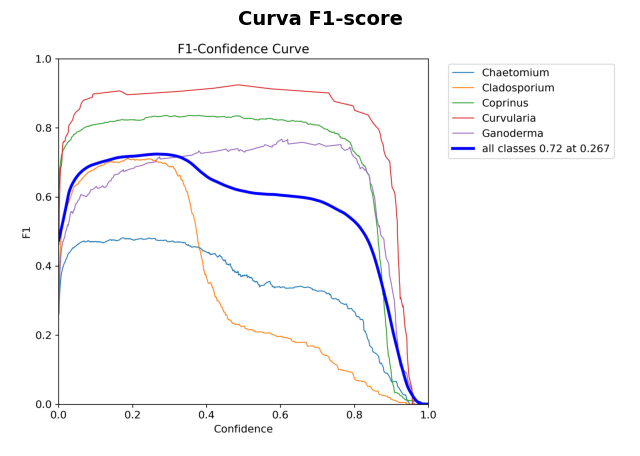

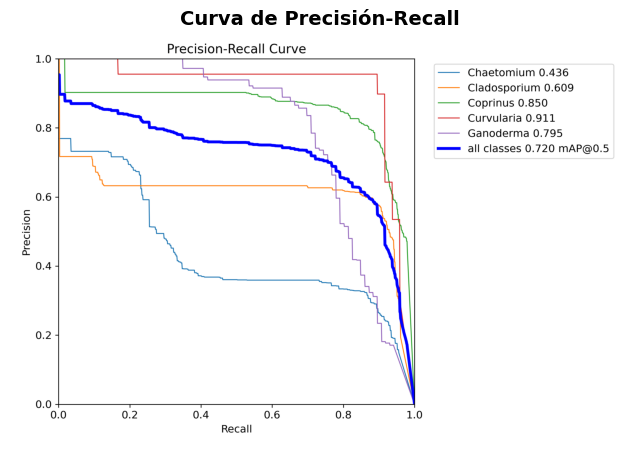

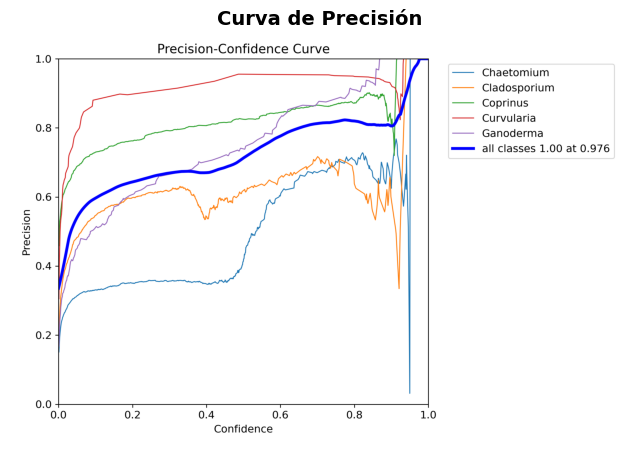

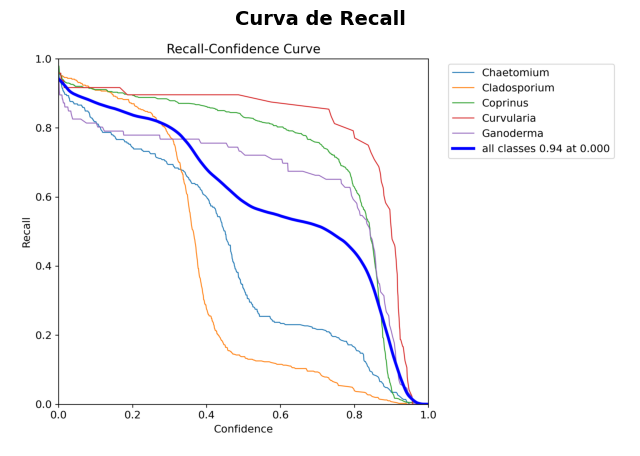

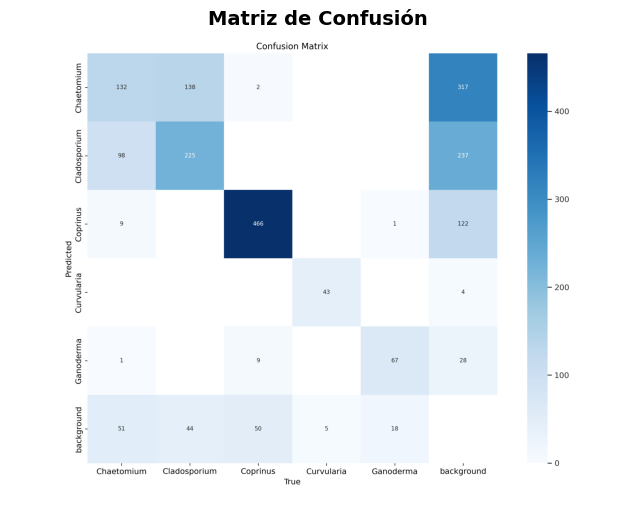

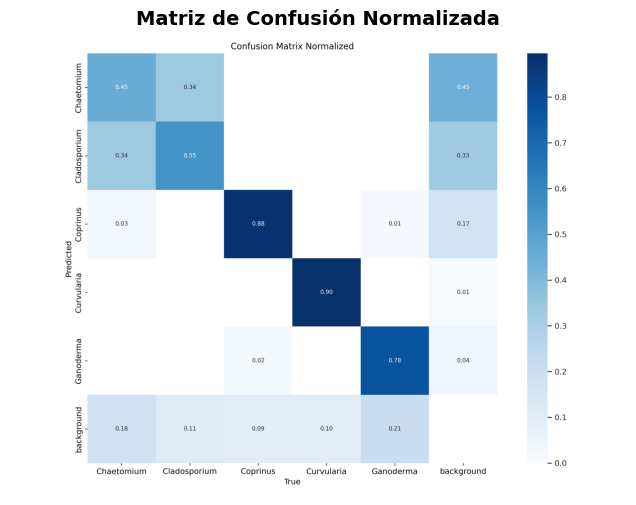

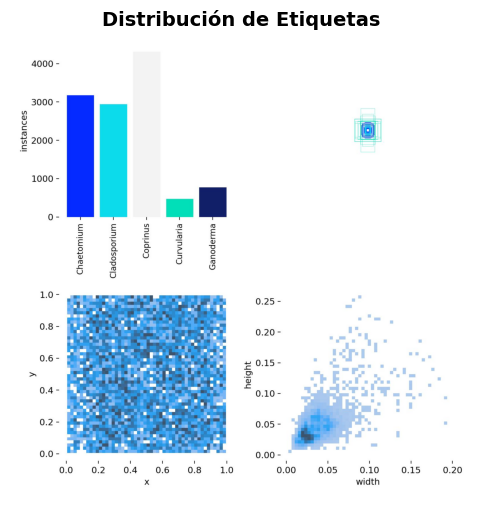

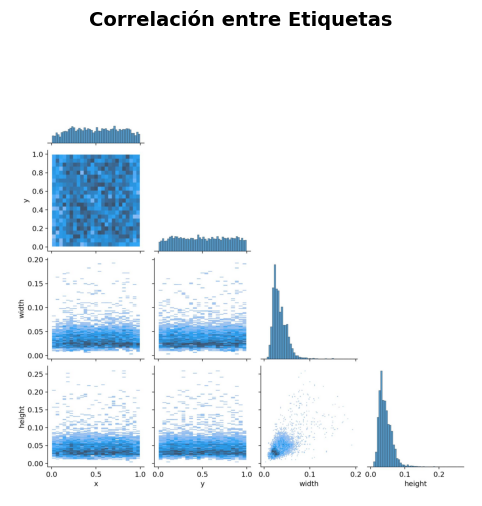

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Lista de rutas de imágenes con títulos explicativos
image_info = [
    ("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/F1_curve.png", "Curva F1-score"),
    ("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/PR_curve.png", "Curva de Precisión-Recall"),
    ("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/P_curve.png", "Curva de Precisión"),
    ("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/R_curve.png", "Curva de Recall"),
    ("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/confusion_matrix.png", "Matriz de Confusión"),
    ("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/confusion_matrix_normalized.png", "Matriz de Confusión Normalizada"),
    ("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/labels.jpg", "Distribución de Etiquetas"),
    ("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/labels_correlogram.jpg", "Correlación entre Etiquetas")
]

# Mostrar imágenes con títulos
for img_path, title in image_info:
    if os.path.exists(img_path):  # Verificar si la imagen existe
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB

        plt.figure(figsize=(8, 6))  # Tamaño de la figura
        plt.imshow(img)
        plt.axis("off")  # Ocultar ejes
        plt.title(title, fontsize=14, fontweight='bold')  # Agregar título descriptivo
        plt.show()
    else:
        print(f"⚠️ No se encontró la imagen: {img_path}")


## Continuar entrenamiento interrumpido

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/weights/best.pt")  # load a partially trained model

# Resume training
results = model.train(resume=True)

## Validación del modelo

In [ ]:
# Load a model
model = YOLO("yolo11x.pt")  # load an official model
model = YOLO("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val(data="/content/drive/MyDrive/proyectoml/dataset/data.yaml",
                    imgsz=640,
                    #batch=-1,
                    exist_ok=True,
                    plots= True,


                    name="final_model_tuned_val")

metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category
print(metrics.box.map)

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 464 layers, 56,832,799 parameters, 0 gradients, 194.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 117MB/s]
val: Scanning /content/drive/MyDrive/proyectoml/dataset/val/labels.cache... 307 images, 21 backgrounds, 0 corrupt: 100%|██████████| 307/307 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:44<00:00,  2.20s/it]


                   all        307       1359      0.663      0.819       0.72       0.57
            Chaetomium        110        291      0.356      0.713      0.436      0.318
          Cladosporium         74        407      0.612      0.821      0.608      0.411
              Coprinus        164        527      0.786      0.885       0.85       0.68
            Curvularia         37         48      0.907      0.896      0.911      0.825
             Ganoderma         67         86      0.652      0.779      0.795      0.615
Speed: 0.5ms preprocess, 50.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/final_model_tuned_val
0.569817922705646


## Resultados

In [ ]:
# Print specific metrics
print("Class indices with average precision:", metrics.ap_class_index)
print("Average precision for all classes:", metrics.box.all_ap)
print("Average precision:", metrics.box.ap)
print("Average precision at IoU=0.50:", metrics.box.ap50)
print("Class indices for average precision:", metrics.box.ap_class_index)
print("Class-specific results:", metrics.box.class_result)
print("F1 score:", metrics.box.f1)
print("F1 score curve:", metrics.box.f1_curve)
print("Overall fitness score:", metrics.box.fitness)
print("Mean average precision:", metrics.box.map)
print("Mean average precision at IoU=0.50:", metrics.box.map50)
print("Mean average precision at IoU=0.75:", metrics.box.map75)
print("Mean average precision for different IoU thresholds:", metrics.box.maps)
print("Mean results for different metrics:", metrics.box.mean_results)
print("Mean precision:", metrics.box.mp)
print("Mean recall:", metrics.box.mr)
print("Precision:", metrics.box.p)
print("Precision curve:", metrics.box.p_curve)
print("Precision values:", metrics.box.prec_values)
print("Specific precision metrics:", metrics.box.px)
print("Recall:", metrics.box.r)
print("Recall curve:", metrics.box.r_curve)

Class indices with average precision: [0 1 2 3 4]
Average precision for all classes: [[    0.43638     0.43594     0.43138     0.42442      0.4168     0.39651     0.33272     0.21592    0.086801   0.0054588]
 [    0.60842     0.60475     0.59384     0.57493     0.52679     0.46636      0.3994      0.2353     0.08779   0.0090247]
 [    0.85005     0.85005     0.85005     0.84876     0.84876     0.84314     0.79428     0.61963     0.26456     0.03188]
 [    0.91138     0.91138     0.91138     0.91138     0.90339     0.90339     0.88088     0.79604     0.76608     0.35867]
 [    0.79486     0.79486     0.79486     0.79486     0.79486     0.79486     0.66103     0.49485     0.20081    0.020951]]
Average precision: [    0.31823     0.41066     0.68012      0.8254     0.61468]
Average precision at IoU=0.50: [    0.43638     0.60842     0.85005     0.91138     0.79486]
Class indices for average precision: [0 1 2 3 4]
Class-specific results: <bound method Metric.class_result of ultralytics.uti

In [ ]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import json


# Diccionario para almacenar los resultados
predictions = {}

# Cargar el modelo YOLO
model = YOLO("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/weights/best.pt")

# Definir las rutas de imágenes y etiquetas
image_folder = "/content/drive/MyDrive/proyectoml/dataset/test/images"
label_folder = "/content/drive/MyDrive/proyectoml/dataset/test/labels"

# Obtener lista de imágenes
image_paths = glob.glob(os.path.join(image_folder, "*.jpg"))  # Cambia la extensión si es diferente

for img_path in image_paths:
    print(f"Procesando imagen: {img_path}")
    # Cargar imagen original
    img_name = os.path.basename(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Obtener tamaño de la imagen
    img_h, img_w, _ = img.shape

    # Obtener la inferencia del modelo
    results = model(img_path)

    # Procesar los resultados del modelo
    pred_img = img.copy()
    image_results = []  # Lista para almacenar las detecciones de esta imagen
    for result in results:
        if result.boxes is not None:
            pred_boxes = result.boxes.xyxy.cpu().numpy()  # Coordenadas absolutas (x_min, y_min, x_max, y_max)
            pred_classes = result.boxes.cls.cpu().numpy()  # Índices de clases
            pred_scores = result.boxes.conf.cpu().numpy()  # Confianza de detección

            for box, cls, score in zip(pred_boxes, pred_classes, pred_scores):
                detection = {
                    "bbox": box.tolist(),  # Convertir a lista para JSON
                    "class": model.names[int(cls)],
                    "confidence": float(score)
                }
                image_results.append(detection)

    # Guardar resultados en el diccionario con el nombre de la imagen
    predictions[img_name] = image_results

# Guardar en un archivo JSON
json_path = "/content/drive/MyDrive/proyectoml/dataset/yolo_predictions.json"
with open(json_path, "w") as json_file:
    json.dump(predictions, json_file, indent=4)

print(f"Resultados guardados en {json_path}")


Procesando imagen: /content/drive/MyDrive/proyectoml/dataset/test/images/20_3_jpg.rf.ab020ae391f7079fca2fb1d3cc25a972.jpg

image 1/1 /content/drive/MyDrive/proyectoml/dataset/test/images/20_3_jpg.rf.ab020ae391f7079fca2fb1d3cc25a972.jpg: 512x640 1 Coprinus, 71.3ms
Speed: 1.7ms preprocess, 71.3ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)
Procesando imagen: /content/drive/MyDrive/proyectoml/dataset/test/images/25_4_jpg.rf.dd1458d090f5f05196285f731e5d36be.jpg

image 1/1 /content/drive/MyDrive/proyectoml/dataset/test/images/25_4_jpg.rf.dd1458d090f5f05196285f731e5d36be.jpg: 512x640 3 Chaetomiums, 3 Cladosporiums, 57.0ms
Speed: 1.5ms preprocess, 57.0ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
Procesando imagen: /content/drive/MyDrive/proyectoml/dataset/test/images/26_1_jpg.rf.95c2786fecff624738c258a59040e53f.jpg

image 1/1 /content/drive/MyDrive/proyectoml/dataset/test/images/26_1_jpg.rf.95c2786fecff624738c258a59040e53f.jpg: 512x640 3 Chaetomiums

Procesando imagen: /content/drive/MyDrive/proyectoml/dataset/test/images/20_3_jpg.rf.ab020ae391f7079fca2fb1d3cc25a972.jpg

image 1/1 /content/drive/MyDrive/proyectoml/dataset/test/images/20_3_jpg.rf.ab020ae391f7079fca2fb1d3cc25a972.jpg: 512x640 1 Coprinus, 71.3ms
Speed: 1.6ms preprocess, 71.3ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 640)


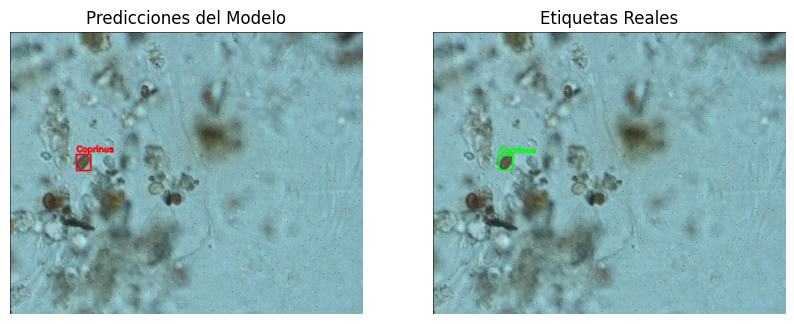

Procesando imagen: /content/drive/MyDrive/proyectoml/dataset/test/images/25_4_jpg.rf.dd1458d090f5f05196285f731e5d36be.jpg

image 1/1 /content/drive/MyDrive/proyectoml/dataset/test/images/25_4_jpg.rf.dd1458d090f5f05196285f731e5d36be.jpg: 512x640 3 Chaetomiums, 3 Cladosporiums, 70.5ms
Speed: 1.7ms preprocess, 70.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


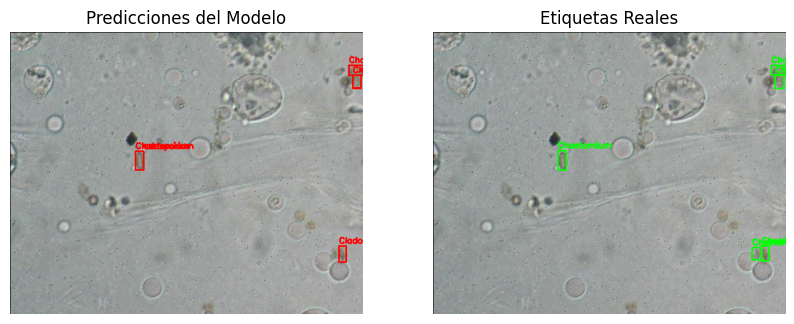

Procesando imagen: /content/drive/MyDrive/proyectoml/dataset/test/images/26_1_jpg.rf.95c2786fecff624738c258a59040e53f.jpg

image 1/1 /content/drive/MyDrive/proyectoml/dataset/test/images/26_1_jpg.rf.95c2786fecff624738c258a59040e53f.jpg: 512x640 3 Chaetomiums, 70.5ms
Speed: 1.7ms preprocess, 70.5ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 640)


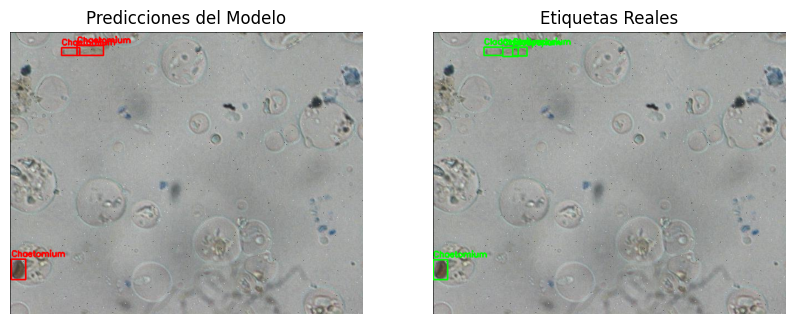

Procesando imagen: /content/drive/MyDrive/proyectoml/dataset/test/images/49_4_jpg.rf.43caf59b78ad2427f4c5f51bac4a7736.jpg

image 1/1 /content/drive/MyDrive/proyectoml/dataset/test/images/49_4_jpg.rf.43caf59b78ad2427f4c5f51bac4a7736.jpg: 512x640 1 Chaetomium, 4 Coprinuss, 70.5ms
Speed: 1.9ms preprocess, 70.5ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 640)


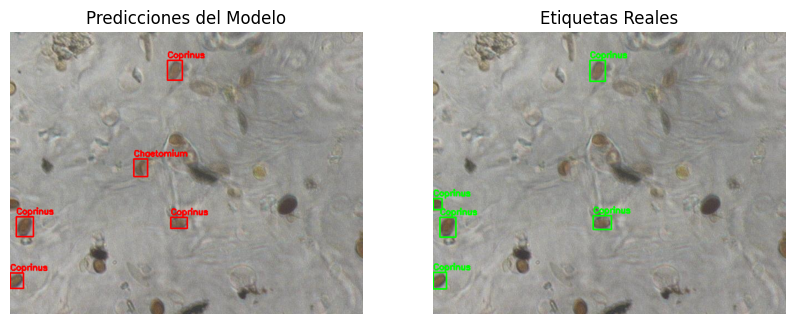

Procesando imagen: /content/drive/MyDrive/proyectoml/dataset/test/images/23_4_jpg.rf.380e527042056c7ad6d014bd2ddc0a1c.jpg

image 1/1 /content/drive/MyDrive/proyectoml/dataset/test/images/23_4_jpg.rf.380e527042056c7ad6d014bd2ddc0a1c.jpg: 512x640 2 Coprinuss, 1 Curvularia, 70.5ms
Speed: 1.8ms preprocess, 70.5ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


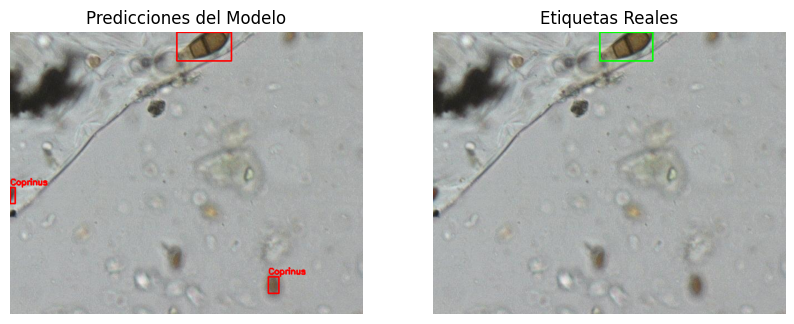

In [ ]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Cargar el modelo YOLO
model = YOLO("/content/drive/MyDrive/proyectoml/runs/detect/final_model_tuned/weights/best.pt")

# Definir las rutas de imágenes y etiquetas
image_folder = "/content/drive/MyDrive/proyectoml/dataset/test/images"
label_folder = "/content/drive/MyDrive/proyectoml/dataset/test/labels"

# Obtener lista de imágenes
image_paths = glob.glob(os.path.join(image_folder, "*.jpg"))  # Cambia la extensión si es diferente

# Función para dibujar los bounding boxes en una imagen
def draw_bounding_boxes(image, boxes, labels, color=(0, 255, 0), thickness=2):
    for box, label in zip(boxes, labels):
        x_min, y_min, x_max, y_max = box
        x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)

        # Dibujar la caja
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

        # Colocar la etiqueta
        cv2.putText(image, label, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

    return image

# Función para cargar etiquetas YOLO de un archivo .txt
def load_yolo_labels(label_path, img_w, img_h):
    boxes = []
    labels = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()
            for line in lines:
                values = line.strip().split()
                class_id = int(values[0])  # Clase (número)
                x_center, y_center, width, height = map(float, values[1:])

                # Convertir de formato YOLO (relativo) a coordenadas absolutas
                x_min = (x_center - width / 2) * img_w
                y_min = (y_center - height / 2) * img_h
                x_max = (x_center + width / 2) * img_w
                y_max = (y_center + height / 2) * img_h

                boxes.append([x_min, y_min, x_max, y_max])
                labels.append(str(class_id))  # Puedes cambiar esto por nombres de clases si tienes un diccionario

    return boxes, labels
i = 0
# Procesar cada imagen
for img_path in image_paths:
    if i >= 5:
        break
    i += 1
    print(f"Procesando imagen: {img_path}")
    # Cargar imagen original
    img_name = os.path.basename(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Obtener tamaño de la imagen
    img_h, img_w, _ = img.shape

    # Obtener la inferencia del modelo
    results = model(img_path)

    # Procesar los resultados del modelo
    pred_img = img.copy()
    for result in results:
        if result.boxes is not None:
            pred_boxes = result.boxes.xyxy.cpu().numpy()  # Coordenadas absolutas (x_min, y_min, x_max, y_max)
            pred_labels = [model.names[int(cls)] for cls in result.boxes.cls.cpu().numpy()]  # Obtener nombres de clases
            pred_img = draw_bounding_boxes(pred_img, pred_boxes, pred_labels, color=(255, 0, 0))  # Azul


    # Cargar etiquetas reales desde la carpeta de labels
    label_path = os.path.join(label_folder, img_name.replace(".jpg", ".txt"))
    gt_img = img.copy()
    gt_boxes, gt_classes = load_yolo_labels(label_path, img_w, img_h)
    # Mapear los IDs de clases a nombres reales
    gt_labels = [model.names[int(cls)] for cls in gt_classes]
    gt_img = draw_bounding_boxes(gt_img, gt_boxes, gt_labels, color=(0, 255, 0))  # Verde

    # Mostrar ambas imágenes juntas
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(pred_img)
    axes[0].set_title("Predicciones del Modelo")
    axes[0].axis("off")

    axes[1].imshow(gt_img)
    axes[1].set_title("Etiquetas Reales")
    axes[1].axis("off")

    plt.show()